Всего записей в базе: 211

Последние 5 записей из таблицы weather:


,id,dt,temperature,humidity,pressure
0,211,2026-01-20 12:13:27.997790,28.53,57.57,758.2
1,210,2026-01-20 12:13:22.991139,26.62,46.26,751.5
2,209,2026-01-20 12:13:17.984621,29.64,42.20,755.9
3,208,2026-01-20 12:13:12.977595,24.52,56.60,750.6
4,207,2026-01-20 12:13:07.931793,25.57,53.51,755.7


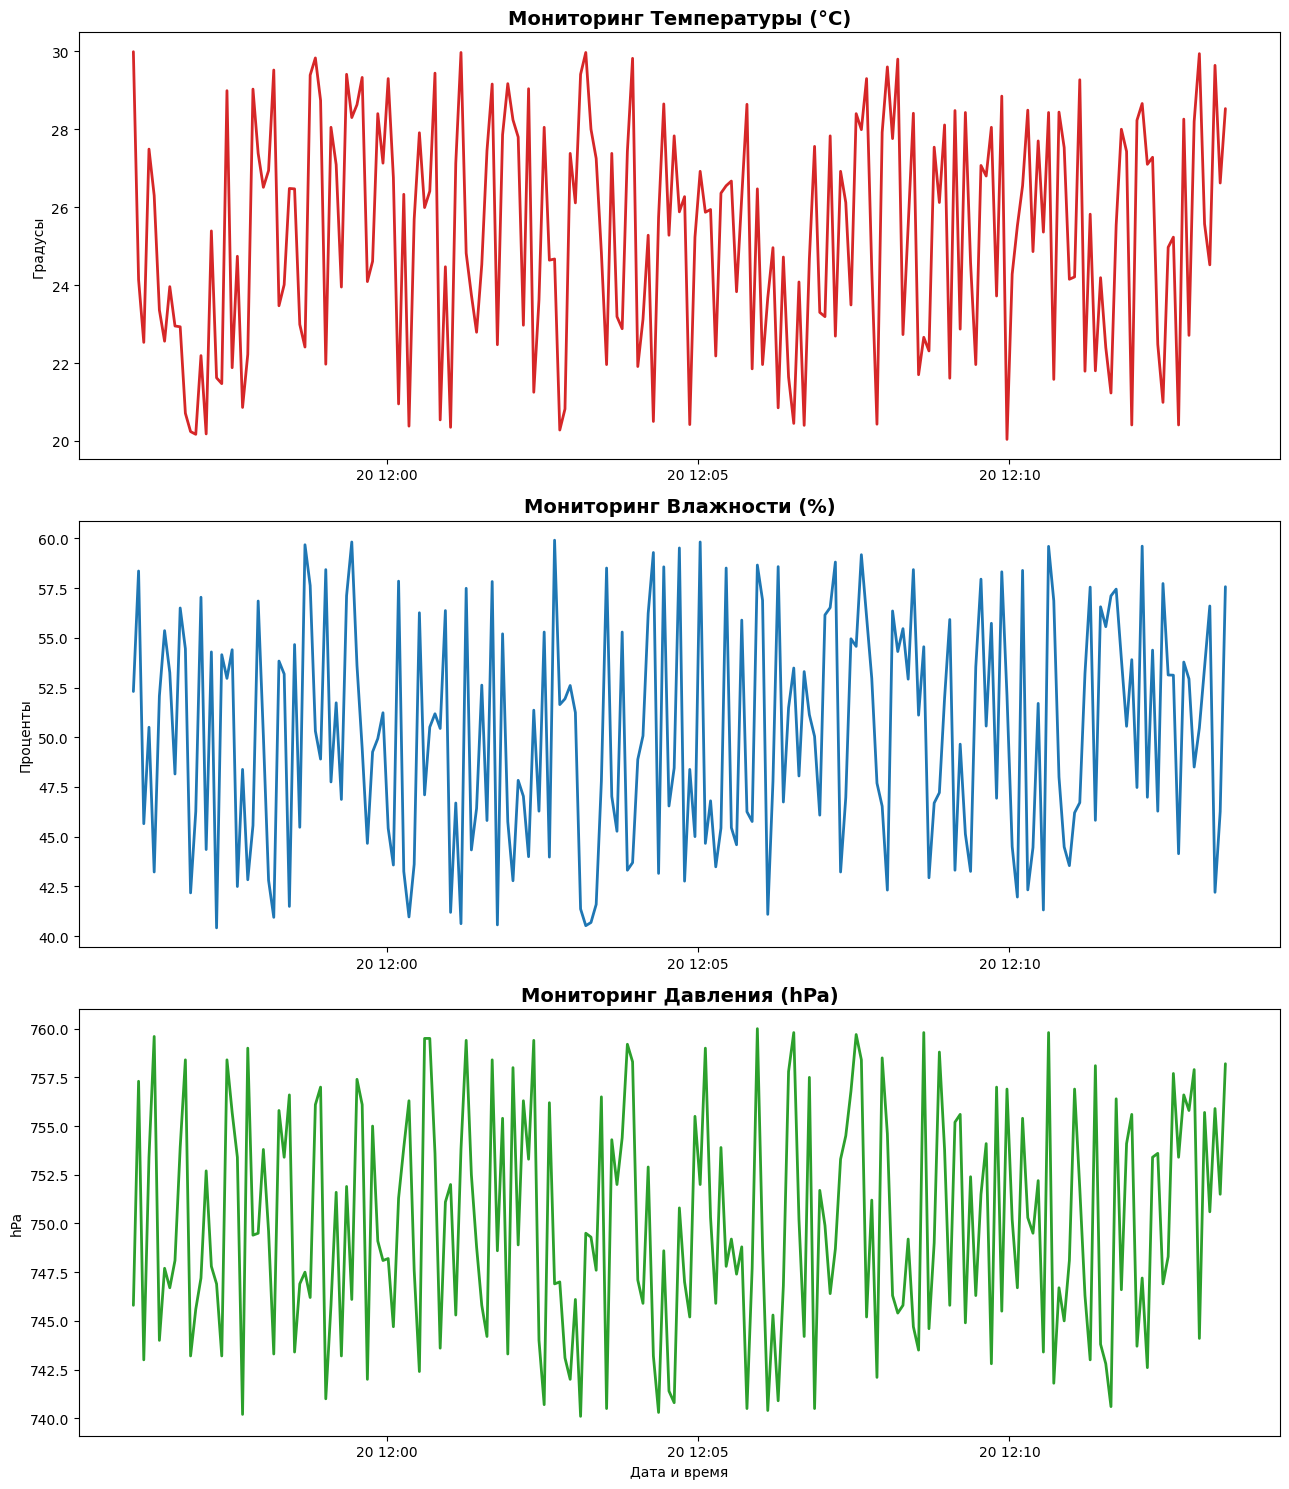

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# 1. Подключение к базе данных
DB_URL = "postgresql://user:password@db:5432/analytics_db"
engine = create_engine(DB_URL)

try:
    # 2. Загрузка данных
    df = pd.read_sql("SELECT * FROM weather ORDER BY dt DESC", engine)
    
    if df.empty:
        print("Данных в базе пока нет. Проверь работу генератора.")
    else:
        # Приводим дату к нужному формату
        df['dt'] = pd.to_datetime(df['dt'])
        
        # 3. Вывод таблицы (первые 5 строк)
        print(f"Всего записей в базе: {len(df)}")
        print("\nПоследние 5 записей из таблицы weather:")
        display(df.head(5))

        # 4. Визуализация: создаем общее поле для 3-х графиков
        # figsize=(ширина, высота)
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 15))
        sns.set_style("whitegrid") # Красивая сетка на фоне

        # График 1: Температура
        sns.lineplot(data=df, x='dt', y='temperature', ax=ax1, color='tab:red', linewidth=2)
        ax1.set_title('Мониторинг Температуры (°C)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Градусы')
        ax1.set_xlabel('')

        # График 2: Влажность
        sns.lineplot(data=df, x='dt', y='humidity', ax=ax2, color='tab:blue', linewidth=2)
        ax2.set_title('Мониторинг Влажности (%)', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Проценты')
        ax2.set_xlabel('')

        # График 3: Давление
        sns.lineplot(data=df, x='dt', y='pressure', ax=ax3, color='tab:green', linewidth=2)
        ax3.set_title('Мониторинг Давления (hPa)', fontsize=14, fontweight='bold')
        ax3.set_ylabel('hPa')
        ax3.set_xlabel('Дата и время')

        # Автоматическая корректировка отступов
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Произошла ошибка: {e}")